In [1]:
#from libs.prefect_helpers import *
from libs.data_manipulation import *
from libs.feature_generation import *
from libs.dim_reduction import *
from libs.football_plots import *
from libs.clustering import *
from libs.convex_hull import *

import matplotlib.pyplot as plt
from sklearn.neighbors import KDTree
from libs.InteractivePitchUI import InteractivePitch, PitchDisplay

from mplsoccer import *
import pandas as pd
import numpy as np
import os
# Click player into the pitch and take those player and apply Ripleys K to them. And then maybe PCA


In [2]:
# Step 6: Extract match data from tracking data
data = compile_team_tracking_data("data/H_EURO2024GERMANY", "Denmark")
print(data.head())
one_match = extract_one_match(data, 1)


   Time [s]_team half_team  minute_team  Period_team   home_6_x  home_6_y  \
0           0.00        1H            0            1  18.863983  6.937420   
1           0.04        1H            0            1  18.860191  6.943985   
2           0.08        1H            0            1  18.856722  6.951682   
3           0.12        1H            0            1  18.853645  6.960831   
4           0.16        1H            0            1  18.851160  6.971420   

   home_18_x  home_18_y   home_1_x  home_1_y  ...  away_16_x  away_16_y  \
0  16.191383  27.790174  52.532173 -0.016596  ...        NaN        NaN   
1  16.196404  27.782358  52.532738 -0.013765  ...        NaN        NaN   
2  16.200035  27.776085  52.534679 -0.010368  ...        NaN        NaN   
3  16.201321  27.769873  52.537842 -0.006824  ...        NaN        NaN   
4  16.199764  27.763958  52.543060 -0.003730  ...        NaN        NaN   

   away_25_x  away_25_y  home_26_x  home_26_y  away_3_x  away_3_y  away_15_x  \
0     

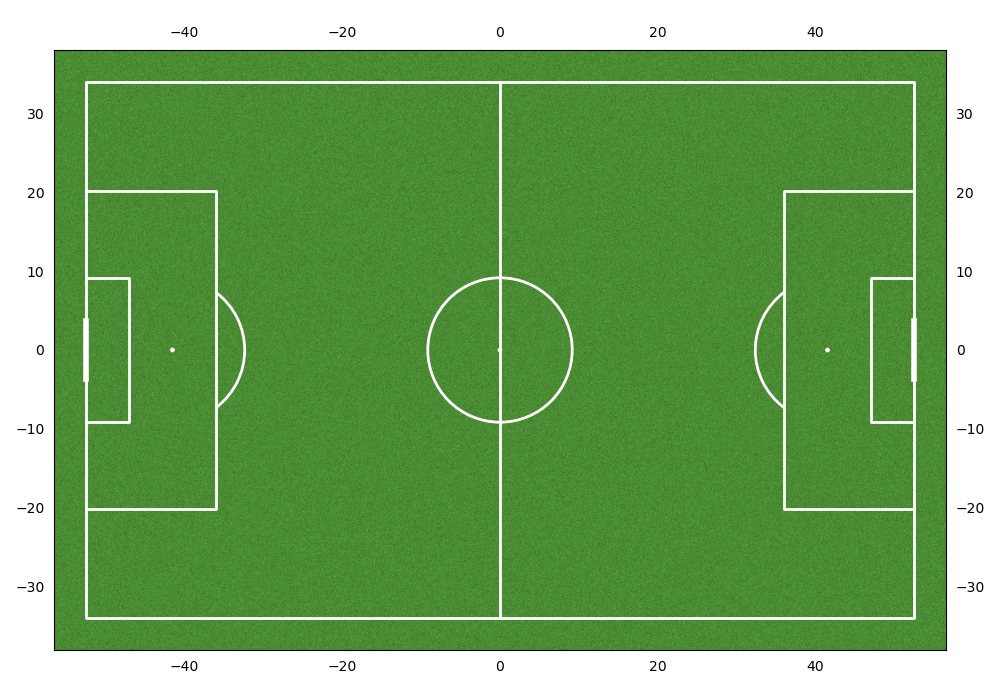

Ball placement mode enabled. Click to place the ball on the pitch.
Ball placed at: (30.917053418470644, 18.24612988631055)
Vector drawing mode enabled. Select start and end points for the vector.
Situation saved! Total saved situations: 1
Cleared the current situation. All players are available for selection again.
Loaded Situation 1
{'home_1_x': 30.536925712505834, 'home_1_y': 17.866002180345745, 'home_2_x': 31.29718112443544, 'home_2_y': 1.2670923532160145, 'home_3_x': 29.269833359289834, 'home_3_y': -14.824980532627311, 'home_4_x': 45.61532471577635, 'home_4_y': -0.38012770596479584, 'home_5_x': 9.12306494315527, 'home_5_y': 27.622613300109016, 'home_6_x': 7.982681825260869, 'home_6_y': 17.10574676841614, 'home_7_x': 16.21878212116492, 'home_7_y': 2.0273477651456204, 'home_8_x': 11.783958884908898, 'home_8_y': -19.51322223952655, 'home_9_x': -1.2670923532160074, 'home_9_y': 11.150412708300891, 'home_10_x': 7.47584488397446, 'home_10_y': 3.674567824326431, 'home_11_x': -2.28076623578

In [3]:
%matplotlib widget

interactive_pitch = InteractivePitch(one_match)


In [4]:
index_displayer = None

In [6]:
if (len(interactive_pitch.vectors) < 1):
    index_displayer = PitchDisplay(one_match,interactive_pitch.similar_situation_indices)

In [7]:
from libs.similar_movement import *
if (len(interactive_pitch.vectors) > 0):
    distance_index_list = find_similar_movement_given_vector(one_match, interactive_pitch.vectors[0] , interactive_pitch.similar_situation_indices )
else:
    distance_index_list = find_similar_movement(one_match, index_displayer.get_selected_index(), interactive_pitch.similar_situation_indices )

139
61717
111318
111366
75925
111414
38723
111462
89345
74830
61669
57585
74878
57143
111510
57428
54752
96130
48517
74926
105327
111558
111606
111702
111654
111750
111798
112278
112086
112182
111990
112230
111846
111894
112038
111942
112134
38675
74974
105375
56076
112326
38771
111152
105519
48565
105423
57095
105471
33410
132058
35368
36069
36021
37590
48469
101822
57191
10778
136431
136383
116164
112579
112531
101774
57047
132010


In [8]:
distance_index_list = sorted(distance_index_list, key = lambda x : x[0])

In [9]:
index_displayer_2 = PitchDisplay(one_match, [index for (_,index) in distance_index_list])